In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')
df = pd.read_excel("/content/drive/MyDrive/ExcelData/train.xlsx")

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset = df
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score
import time
import seaborn as sns


# Initialize an empty dictionary to store results
component_accuracies = {}

# Define the range of components to test
n_components_range = range(1, X.shape[1] + 1)

# Iterate through the number of components
for n_components in n_components_range:
    # Create a PCA object with the current number of components
    pca = PCA(n_components=n_components)

    # Fit and transform the training data
    X_train_pca = pca.fit_transform(X_train)

    # Train a machine learning model on the transformed data
    clf = SVC(kernel='linear')

    # Perform cross-validation to estimate the accuracy
    scores = cross_val_score(clf, X_train_pca, y_train, cv=5)

    # Store the mean accuracy for the current number of components
    component_accuracies[n_components] = np.mean(scores)

# Find the number of components with maximum accuracy
best_n_components = max(component_accuracies, key=component_accuracies.get)
best_accuracy = component_accuracies[best_n_components]

# Fit the PCA with the best number of components on the full training data
best_pca = PCA(n_components=best_n_components)
X_train_pca = best_pca.fit_transform(X_train)
X_test_pca = best_pca.transform(X_test)

# Train the final model with the optimal number of components
start = time.perf_counter()
final_model = SVC(kernel='linear')
final_model.fit(X_train_pca, y_train)
end = time.perf_counter()

# Evaluate the final model on the test data
test_accuracy = final_model.score(X_test_pca, y_test)

print(f"Optimal number of components: {best_n_components}")
print(f"Training accuracy with {best_n_components} components: {best_accuracy}")
print(f"Test accuracy with {best_n_components} components: {test_accuracy}")
print('Time taken:', end-start, 'sec')

Optimal number of components: 29
Training accuracy with 29 components: 0.9099987880256938
Test accuracy with 29 components: 0.9064748201438849
Time taken: 0.2224791119999736 sec


Confusion Matrix:


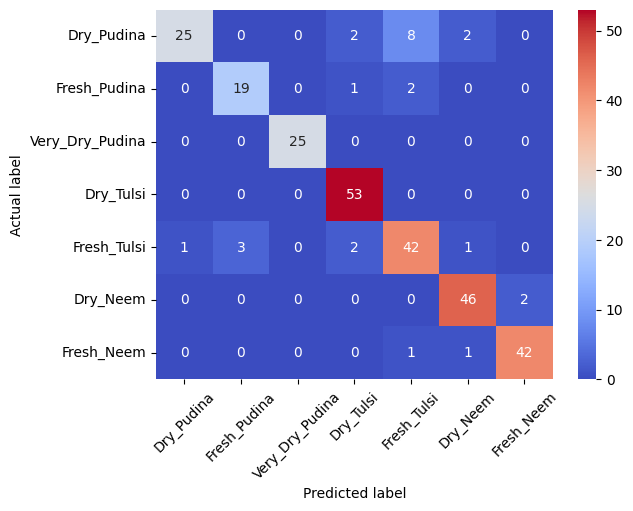

In [ ]:
y_pred = final_model.predict(X_test_pca)
lb = ['Dry_Pudina', 'Fresh_Pudina', 'Very_Dry_Pudina', 'Dry_Tulsi', 'Fresh_Tulsi', 'Dry_Neem', 'Fresh_Neem']
confusion_mat = confusion_matrix(y_test,y_pred, labels=lb)
print("Confusion Matrix:")
sns.heatmap(
    confusion_mat,
    annot=True,
    fmt="d",
    cmap="coolwarm",
    xticklabels=lb,
    yticklabels=lb,
)
plt.xticks(rotation=45)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

In [ ]:
print(component_accuracies)

{1: 0.19080919484506928, 2: 0.3897547771987234, 3: 0.5589504302508786, 4: 0.6975720114733568, 5: 0.8029087383347473, 6: 0.8703955076152387, 7: 0.8883973659758414, 8: 0.8875005049892941, 9: 0.8929018704803457, 10: 0.9063951844220902, 11: 0.9063951844220902, 12: 0.9072960853229912, 13: 0.9081969862238921, 14: 0.909097887124793, 15: 0.909097887124793, 16: 0.909097887124793, 17: 0.909097887124793, 18: 0.909097887124793, 19: 0.909097887124793, 20: 0.909097887124793, 21: 0.909097887124793, 22: 0.909097887124793, 23: 0.909097887124793, 24: 0.909097887124793, 25: 0.909097887124793, 26: 0.909097887124793, 27: 0.909097887124793, 28: 0.909097887124793, 29: 0.9099987880256938, 30: 0.9099987880256938, 31: 0.9099987880256938, 32: 0.9099987880256938, 33: 0.9099987880256938, 34: 0.9099987880256938, 35: 0.9099987880256938, 36: 0.9099987880256938, 37: 0.9099987880256938, 38: 0.9099987880256938, 39: 0.9099987880256938, 40: 0.9099987880256938, 41: 0.9099987880256938, 42: 0.9099987880256938, 43: 0.90999878